# Cargar ficheros de datos en diferentes formatos
Hay conjuntos de datos de diversos tipos:
* Tablas de datos con valores discretos (como "Sí", "No", "Ns/Nc"), con valores numéricos, o con ambos tipos mezclados.
* Tablas donde cada línea representa un objeto que pertenece a una clase (como "Correcto", "Defectuoso"), otras donde queremos predecir el valor numérico de una columna (regresión), otras donde lo que queremos es agrupar los objetos por valores parecidos.
* Colecciones de imagenes
* Colecciones de textos
* Listados de valores en el tiempo (series temporales)
* Datos que representas grafos, mapas...

Los conjuntos de datos de un mismo tipo se pueden presentar en diversos formatos. Por ejemplo los datos de tablas pueden aparecer como: CSV, ARF, Table, HDF5... 

Una habilidad muy útil para la científica de datos es ser capaz de procesar y trabajar con cualesquiera datos que se encuentre en un problema. Con lo que ya se ha visto en las anteriores asignaturas de programación y una descripción adecuada del formato de los datos, es posible abordar la carga de esos datos. Sin embargo, hay una serie de datos típicos y formatos habituales para los que hay herramientas que nos permiten cargarlos más fácilmente. Vamos a ver un algunos de ejemplos.

## Carga de datos en Pandas
La librería de Python Pandas, que ya conoceis de la asignatura de programación anterior, es una librería especiazada en el trabajo con datos tabulares. Nos referimos así a los datos que se pueden estructurar en tablas. Estas tablas se denominan _data frame_ (marco de datos) en diversos entornos de programación (incluido Pandas). También consideramos datos tabulares a aquellos que se pueden almacenar en tablas de una sola columna, que en Pandas se almacenan como objetos _Series_. El tutorial de comienzo de Pandas tiene una buena explicación del [tipo de datos con los que nos ayuda a trabajar Pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html).
![Datos tabulares](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

Comenzamos inicializando Pandas.

In [1]:
import pandas as pd
print('Pandas versión: ', pd.__version__)

Pandas versión:  1.3.3


Probablemente, el formato más conocido para ficheros tabulares es el **CSV** (_Comma Separated Values_). Son ficheros de texto que se pueden abrir con cualquier editor. Son muy utilizados por esta sencilles y porque todos los programas de hojas de cálculo (como el LibreOffice Calc por ejemplo) permiten exportar e importar datos en este formato. Aunque su nombre indica que son valores separados por comas y este es su formato estándar, nos podemos encontrar muchos ficheros que usan otros separadores. Este es uno más de los problemas debidos a la dificultad que tenemos los seres humanos para ponernos de acuerdo en qué simbolo usar como separador para los decimales (el número Pi con dos decimales expresado en diferentes naciones: 3'14  3.14  3,14).

Para leer estos ficheros, Pandas tiene la función `read_csv` que permite cargarlos de manera muy simple. Por ejemplo:

In [17]:
tabla = pd.read_csv('example1.csv')
tabla

,x1,x2,x3,class
0,1,0,0,A
1,1,0,0,A
2,1,1,0,B
3,1,1,1,C
4,1,1,1,C
5,1,1,1,A


Sin embargo, como nos encontraremos datos que usen otros separadores, la función `read_csv` tiene parámetros para permitir cargar muchas varieades de ficheros. Por ejemplo, el fichero `example2.csv` usa el punto y coma como separador y la coma francesa para los números decimales:
```
x1;x2;class
1,0;0;A
0,3;0;A
```

**Ejercicio**: Leer la [documentación de los parámetros de la función read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) y usar los dos necesarios para leer correctamente el fichero `example2.csv`. El resultado debe ser:

```
1.0
numpy.float64
```


In [19]:
tabla = pd.read_csv('example2.csv', sep=";") # Añade los parámetros a esta llamada
print(tabla['x1'][0])
type(tabla['x1'][0])

1,0


str

A veces el separador no es un único caracter. Por ejemplo, en el conocido fichero de datos público sobre el coste de las casas en Detroit los datos aparecen así:
```
 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60
```
Como se puede observar hay varios espacios separando los valores. Visualmente es muy claro que queden alineados pero, si intentamos usar `sep=' '` en la llamada a `read_csv`, no funcionará. Afortunadamente, el parámetro `sep` permite [expresiones regulares](https://docs.python.org/3/library/re.html) como separadores.

**Ejercicio**: Cambia el separador en el siguiente código por una expresión regular que indique uno o varios espacios para poder cargar el fichero de datos.

In [ ]:
tabla = pd.read_csv('housing.csv', sep=' ')
tabla

Otro problema que nos encontramos con este fichero de datos es que no tiene cabecera. Habrás visto que, al no tenerla, asigna erroneamente los valores del primero objeto como nombres de las columnas. Para evitarlo bastaría con poner el parámetro `header=None`. 

Por otra parte, sabemos que las columnas representan:

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to ﬁve Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per \$10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s

**Ejercicio**: Usa el parámetro `names` para darle un nombre adecuado a las columnas

In [21]:
tabla = pd.read_csv('housing.csv', sep='\s+', names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATO", "B", "LSTAT", "MEDV"])
tabla

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Carga de datos en Numpy
### Tablas de datos
Los datos cargados en Pandas pueden transformarse en una array de Numpy fácilmente con el método `to_numpy` de los objetos `Dataframe` (las tablas de Pandas).

In [ ]:
a = tabla.to_numpy()
a

### Imagenes
Sin emgargo, Numpy nos interesará especialmente cuando lo que queramos sea trabajar con datos de imágenes, ya que éstas son básicamente arrays de pixeles. Vamos a ver como podemos cargar los valores de color de imagenes en arrays de Numpy. Primero inicializamos Numpy y la librería para manejo de imágenes [Pillow](https://pillow.readthedocs.io/en/stable/) (también conocida por su antiguo nombre PIL). Si no la tuvieses instalada, puedes hacerlo con tu gestor de paquetes, por ejemplo, con pip:

In [ ]:
#!pip3 install Pillow # quitar el comentario (# inicial) si se quiere instalar con pip dentro de Jupyter

Inicializamos los paquetes que vamos a usar

In [6]:
import numpy as np
print('Numpy version: {}'.format(np.__version__))

Numpy version: 1.21.2


In [2]:
import PIL
from PIL import Image
print('Pillow version: {}'.format(PIL.__version__))

Pillow version: 9.0.0


Podemos cargar una imagen fácilmente (y aquí en Jupiter verla directamente) con:

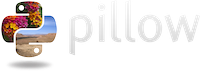

In [3]:
img = Image.open('pillow-logo.png')
img

y extraer sus píxeles a un array con:

In [7]:
array = np.array(img)
print(array.shape)

(71, 200, 4)


Vemos que tiene 71 pixeles de alto por 200 de largo y 4 canales de color. 

A continuación, vemos los valores de un trozo de la imagen de cinco filas y dos columnas. En esta imagen, los valores de cada pixel son enteros de 0 a 255 de los tonos RGBA (Red, Green, Blue, Alpha):

In [8]:
array[20:25,20:22,:]

array([[[181,  60, 114, 255],
        [163,  67, 101, 255]],

       [[163,  35,  98, 255],
        [179,  85, 133, 255]],

       [[158,   0,  77, 255],
        [151,  48,  97, 255]],

       [[215,  64, 155, 255],
        [170,  32, 116, 255]],

       [[162,  53, 113, 255],
        [158,  52, 112, 255]]], dtype=uint8)

Podemos de esta forma aplicar todas las operaciones e indexados que hemos aprendido con arrays sobre una imagen. Por ejemplo, el canal Alpha es el valor de opacidad/transparencia de esta imagen. Podemos quitarle la transparencia a toda la imagen con esta simple operación y volver a convertir el array en imagen.

In [ ]:
array[:,:,3] = 255
invimg = Image.fromarray(array)
invimg


**Ejercicio**: aplica transformaciones a esta y otras imágenes. Por ejemplo, puedes aplicar las mismas transformaciones que hiciste en la asignatura previa de programación pero ahora usando operaciones sobre arrays. 

Hay más información tipo tutorial sencillo sobre como manipular imagenes con numpy en [esta página](https://www.pythoninformer.com/python-libraries/numpy/numpy-and-images/) y, mucho más detalle en la [documentación oficial de Pillow](https://pillow.readthedocs.io/en/stable/).

## Carga de datos desde OpenML
[OpenML](https://www.openml.org/) es un repositorio de conjuntos de datos y los resultados de aplicar algoritmos de aprendizaje automático (_Machine Learning_) sobre los mismos. Es una fuente muy interesante para hacer pruebas y ver como de bien funcionan nuestros propios algoritmos.

In [ ]:
#!pip3 install -U scikit-learn  # quitar el comentario (# inicial) si se quiere instalar con pip dentro de Jupyter

Inicializamos Scikit learn:

In [9]:
import sklearn
print('Scikit learn version: {}'.format(sklearn.__version__))

Scikit learn version: 1.0.1


Vamos a descargar por ejemplo el dataset [olindda_outliers](https://www.openml.org/d/42793):

In [13]:
from sklearn import datasets
dataset = datasets.fetch_openml(name='olindda_outliers', as_frame=False)
dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Como puedes ver el objeto dataset tiene mucha información sobre el conjunto de datos descargado. Para trabajar con él con Numpy, nos interesarán los arrays `data` y `target` que contienen los valores de los objetos y la clase asignada a los mismos respectivamente:

In [14]:
dataset.data.shape

(75, 2)

In [15]:
dataset.target.shape

(75,)

También es posible decargar estos conjuntos de datos para usarlos desde Pandas. Para ello pondremos el parámetro `as_frame` a `True`. Nota: el valor por defecto de este parámetro ha cambiado entre versiones de sklearn por eso conviene ponerlo siempre.

In [16]:
dataset = datasets.fetch_openml(name='olindda_outliers', as_frame=True)
dataset.data

,x_0,x_1
0,82.136441,-74.928833
1,61.100717,-67.410193
2,36.683335,-68.236317
3,66.985287,-77.428261
4,79.611189,-68.236317
...,...,...
70,35.848913,-59.891553
71,93.203077,-35.661977
72,44.390298,-33.097975
73,40.174572,-21.385194
